
# Isomap


### This section covers the Isomap Algorithm

**Isomap** (Isometric mapping) is one of the foundational algorithms in non-linear dimensionality reduction and manifold learning[<sup>1</sup>](#fn1). <br>
<br>
Isomap introduces a unique approach to learning global geometric structure, which is based on representing high dimensional datasets with nearest neighbor graphs. The idea is that the distances you travel along the edges of the graph approximate distances along the global manifold. <br>
<br>
By learning the metric along the manifold, Isomap can learn complex, non-linear geometries and provide a lower dimensional embedding that preserves these higher dimensional, global metric relationships.       

Without sacrificing too much formalism, an **Isometry** is a bijective map between our two metric spaces that preserves distances.

The basic approach is quite similar to the following Spectral/Matrix Decomposition steps:<br>
> 1. Find k nearest neighbors for each data point <br>
2. Calculate pairwise distance/similarity measures to learn instrinsic structure and the manifold approximation <br>
3. Find a lower dimensional configuration of the data that preserves the pairwise distances from matrix $D$. <br>

Isomap offers a unique advantage because it doesn't just use local linear relationships (LLE) and it doesn't just use the global Euclidean distances (MDS) to learn the higher dimensional manifold structure. <br>
<br>
Isomap creates a kNN graph from the local neighbors and uses **geodesic distances** to try and find how close two points are *along the manifold*, instead of a Euclidean distance that only locally approximates the manifold.

![title](Geodesic-and-Euclidean-distances-between-A-and-B_W640.jpg)


### More on Geodesics and the kNN Graph

In general, a **geodesic** is the locally length-minimizing path between two points. These geodesics depend on the geometry of the given curved surface, and they are usually discussed in the context of Riemmanian metric spaces. <br>
<br>
On a plane, a geodesic would just be a straight line. On the surface of the sphere, the geodesic path depends on the curvature of the sphere. If you imagine an ant walking on a hill, the shortest path between two points would be some path along the hilly surface that might look different depending on the curvature of the hills and valleys. <br>

![title](great_circle.png)

We can define geodesics in a more general case that also applies to graph networks. The graph geodesic is the shortest, or minimally weighted, possible path along the edges between two nodes. Here we show a 2D example illustrating a kNN graph and we compare geodesic vs. Euclidean distances. 

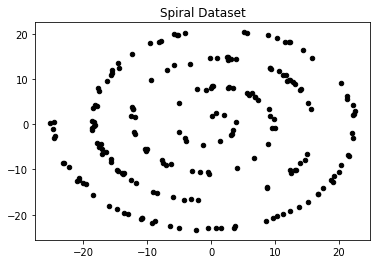

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# spiral dataset
n = np.sqrt(np.random.rand(200,1)) * 1440 * (2*np.pi)/360
d1x = -np.cos(n)*n + np.random.rand(200,1) * 0.8
d1y = np.sin(n)*n + np.random.rand(200,1) * 0.8

plt.scatter(d1x, d1y, c = 'black', s=20)
plt.title('Spiral Dataset')
X = np.hstack((d1x,d1y));

This is a very simple non-linear manifold. The data here approximately lies along this embedded curved in $\mathbb{R^2}$, and looks locally linear. Now we find the k nearest neighbors and draw edges connecting them on the graph. Note that we find these original nearest neighbors by the Euclidean distance in this original space.

In [11]:
# compute pairwise distance matrix to find k nearest neighbors for each Xi in X
from sklearn.metrics import pairwise_distances
dist_matrix = pairwise_distances(X)
dist_matrix.shape

# function that outputs N x k matrix with k nearest neighbors for each observation in X
def nearest_neighbors(X, k):
    # we use k+1 here since Xi will have the shortest distance to itself
    knn_matrix = np.zeros((len(X), k))
    # compute pairwise distances
    dist_matrix = pairwise_distances(X)
    # for each row find indices of k nearest neighbors
    for i in range(len(X)):
        knn_matrix[i] = dist_matrix[i,:].argsort()[1:k+1]
    return knn_matrix

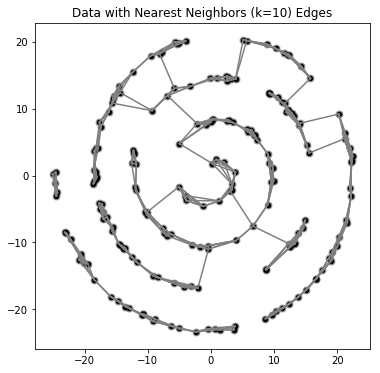

In [12]:
# loop through each data point and draw lines to nearest neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50);

k = 4
for i in range(len(X)):
    neighbors = nearest_neighbors(X, k)[i]
    for j in range(len(neighbors)):
        plt.plot(X[[i, neighbors.astype('int')[j]], 0], X[[i, neighbors.astype('int')[j]], 1], c='gray')

plt.title('Data with Nearest Neighbors (k=10) Edges')
plt.scatter(X[:,0], X[:,1], c='black', s=20);

Now let's look at one region to see how the Geodesic distances might better describe the manifold structure than Euclidean distances.

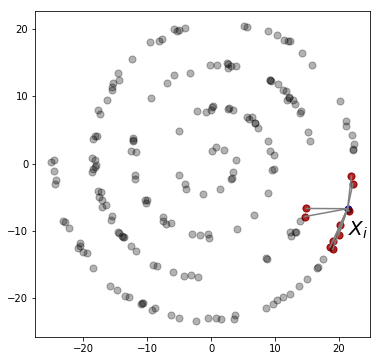

In [13]:
# neighbors for a given xi (first element in X)
neighbors = nearest_neighbors(X, 10)[0] # indices of neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[0, 0], X[0, 1], c='blue', s=50, alpha=0.8)
plt.text(X[0, 0], X[0, 1] - 4, s='$X_i$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[0, neighbors.astype('int')[i]], 0], X[[0, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50);

In [14]:
neighbors = nearest_neighbors(X, 10)[0]
xi_nn = []
for i in range(len(neighbors)):
    xi_nn.append(X[neighbors.astype('int')[i]])
xi_nn = np.array(xi_nn)

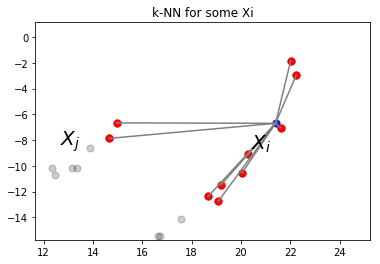

In [15]:
plt.scatter(X[0, 0], X[0, 1], c='blue', s=50, alpha=0.8)
plt.text(X[0, 0] - 1, X[0, 1] - 2, s='$X_i$', size=20)
plt.text(xi_nn[9][0]-2.0, xi_nn[9][1] - 0.5, s='$X_j$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[0, neighbors.astype('int')[i]], 0], X[[0, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.2, c='black', s=50);
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
plt.title('k-NN for some Xi')
plt.xlim(np.min(xi_nn[:,0])-3,np.max(xi_nn[:,0])+3)
plt.ylim(np.min(xi_nn[:,1]-3),np.max(xi_nn[:,1])+3);

In this case the Euclidean distances give us nearest neighbors that don't necessary provide the nearest neighbors along the manifold. $X_i$ and $X_j$ are close in the 2D Euclidean space, but if you think about only being able to move along the spiral ring manifold then $X_j$ would be further than many other candidate neighbors for $X_i$.<br>
<br>
Using geodesic distances with Isomap helps us uncover this manifold structure, as opposed to using only Euclidean distances (like LLE and MDS). Euclidean distances can often fail because of this "short-circuit" problem, where points can be close in the larger external space but far away on the non-linear manifold. <br>
<br>
Additionally, experimenting with different values of k can improve the performance of Isomap here by not allowing too many 'jumps' through the external Euclidean space.


# The Isomap Algorithm

**Steps**: <br>
1. Find the k nearest neighbors for each point (based on their Euclidean distances in original space) <br>
2. Create graph $G$ with edges connecting nearest neighbors (with the Euclidean distances as edge weights) <br>
3. Compute geodesic similarity matrix $D$ with pairwise shortest-path distances along the graph $G$ (Dijkstra's algorithm) <br>
4. Apply MDS  to form the lower dimensional embedding


## kNN graph and Geodesic Distances

After computing the pairwise distances in the Euclidean space we find the k nearest neighbors for each data point. (either with the $\epsilon$-ball method where you only include neighbors within some $\epsilon$ radius or just include the k nearest Euclidean distances)


Next, define the graph $$G = ({V, E)}$$ <br>
Let every data point $X_i$ be a node $v \in V$ with edges $e_{i,j}$ connecting every pair $X_i$, $X_j$

Given data points $X_i$, $X_j$ define the corresponding edge weights by <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      d(i,j) & X_j \text{is a nearest neighbor of $X_i$} \\
      \infty & otherwise \\ 
   \end{cases}
\\ $$


## Shortest Path Algorithms and Pairwise Geodesic Distances

We have two prominent algorithms for finding the shortest or minimum weight path between two nodes in a graph: <br>
- Dijkstra's Algorithm <br>
- The Floyd-Warshall Algorithm

I won't go into their implementations too extensively, but the important point is that these algorithms compute pairwise geodesic distances between our data points, which is our final input that we use to configure our lower dimensional reduction.

Floyd's Algorithm 
------------------------------------------------------
Floyd's algorithm computes the geodesic distances between all pairs of
points on a graph. Its complexity is $\mathcal O(n^3)$, while Dijkstra runs in $\mathcal O(n^2\log(n))$.

The idea behind Floyd's algorithm is to set the geodesic distances iteratively: <br>
- For neighbors with already defined edge weights let $D_{i,j}$ = $d(X_i, X_j)$ <br>
- Else search through intermediate edges, finding iteratively shortest distances before arriving at the computed geodesic

Floyd's algorithm iterates over k with the following update rule, for $k=1,\dots,n$

$D(i,j) \leftarrow \min(D(i,j), \underbrace{D(i,k)+D(k,j)}_{\text{intermediate edge}})$

Dijkstra's Algorithm
------------------------------------------------------

Dijkstra's algorithm is a little harder to explain succinctly. It is a depth-first search algorithm to find the shortest path between a source node and a target node. It also works in an iterative process that keeps track of unvisited nodes with the lowest weights, and tries finding better intermediate paths through these unvisited nodes, updating the distance from the source node while it goes along.

There's plenty of great resources explaining Dijkstra's algorithm for more details on its implementation and computational complexity, but I provide some pseudocode and an explanation from wikipedia here https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm:

> <br>
1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set. <br>
2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current. <br>
3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, keep the current value. <br>
4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again. <br>
5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished. <br>
6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3. <br>

Pseudocode for Dijkstra's Algorithm:

`1 function Dijkstra(Graph, source):
 2
 3      create vertex set Q
 4
 5      for each vertex v in Graph:             
 6          dist[v] ← INFINITY                  
 7          prev[v] ← UNDEFINED                 
 8          add v to Q                      
10      dist[source] ← 0                        
11      
12      while Q is not empty:
13          u ← vertex in Q with min dist[u]    
14                                              
15          remove u from Q 
16          
17          for each neighbor v of u:           
18              alt ← dist[u] + length(u, v)
19              if alt < dist[v]:               
20                  dist[v] ← alt 
21                  prev[v] ← u 
22
23      return dist[], prev[]`


## Applying Multidimensional Scaling

We now have our pairwise geodesic distance matrix D which we can input to Multidimensional Scaling

We use the squared geodesic distances $D_2$ to calculate the approximated Gram matrix $B$ <br>
<br>
$$\boxed {B = \frac{-1}{2} C_n D_{2} C_{n}^T}$$ <br>
**Note:** <br>

$C_{n}$ = Centering matrix, $D_2$ = matrix with entries ${d_{ij}^2}$ <br>

We can now use the eigendecomposition of B: <br>
$$B = X X^T = V \Lambda V^T$$ <br>
using the fact that $B$ is symmetric, positive definite n x n matrix
and so <br>
<br>
$$ \boxed{X = \Lambda^\frac{1}{2} V^T}$$ 

We can reduce the dimensionality to $q \leq p$: <br>
$$ \boxed{X_{q} = \Lambda_{q}^\frac{1}{2} V_{q}^T}$$

by choosing the first q columns of V where $\Lambda_{q}$ is the first q x q submatrix

We've now used the knn-Graph to calculate geodesic distances, and applied Multidimensional Scaling to preserve these geodesic distances, such that we retain information about the manifold structure while reducing the dimensionality.


# Isomap Examples with Sklearn.manifold

We now show an example of creating this k-NN graph and computing the geodesic distances on our favorite dataset for manifold learning: the swiss roll.

In [74]:
n = 1000

from numpy import random
x = random.rand(2,n)

v = 3*np.pi/2*(.1 + 2*x[0,:])
X  = np.zeros([3,n])
X[1,:] = 20*x[1,:]
X[0,:] = - np.cos(v)*v
X[2,:] = np.sin(v)*v

In [75]:
ms = 200
el = 20; az = -110

Display the point cloud.

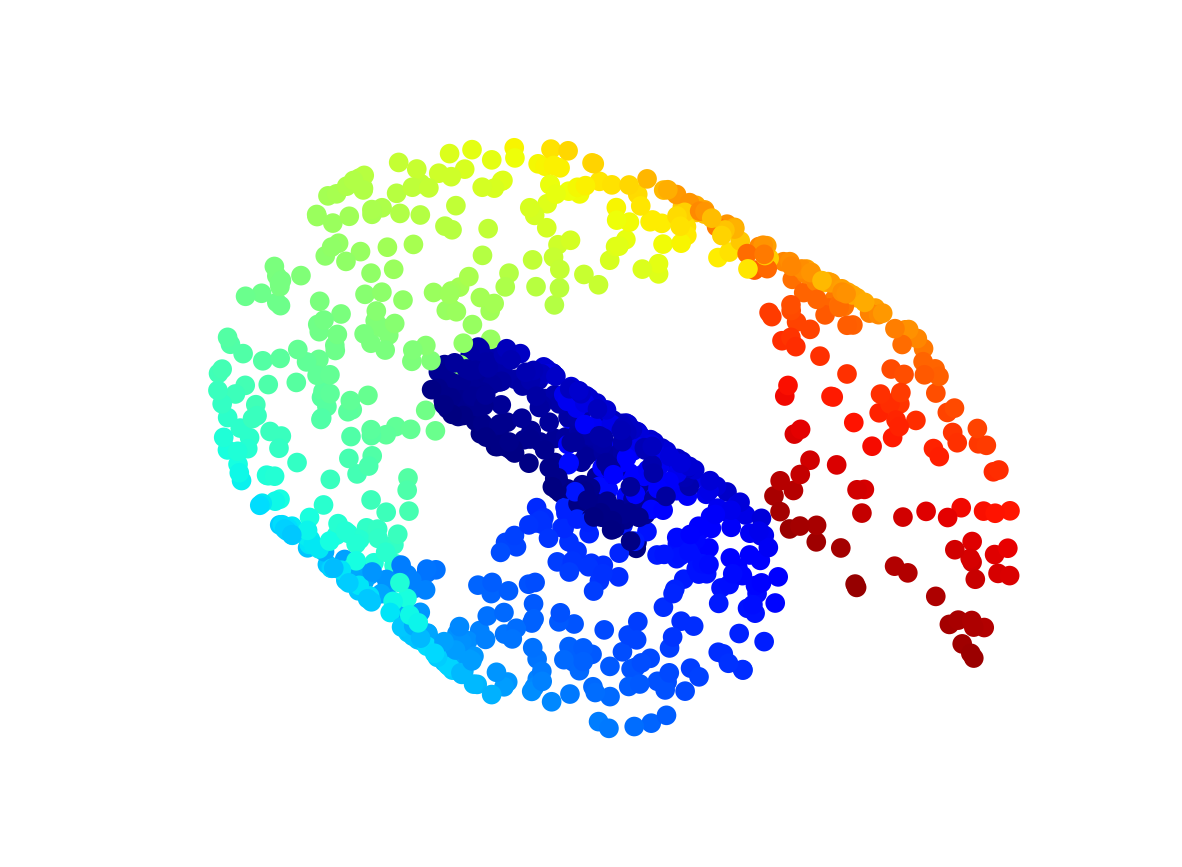

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111, projection="3d")

#swiss roll
ax.scatter(X[0,:], X[1,:], X[2,:], c=plt.cm.jet((X[0,:]**2+X[2,:]**2)/100), s=ms, lw=0, alpha=1)

#params
ax.set_xlim(np.min(X[0,:]),np.max(X[0,:]))
ax.set_ylim(np.min(X[1,:]),np.max(X[1,:]))
ax.set_zlim(np.min(X[2,:]),np.max(X[2,:]))
ax.axis("off")
ax.view_init(elev=el, azim=az);

Compute the pairwise Euclidean distance matrix.

In [77]:
D1 = np.repeat(np.sum(X**2, 0)[:,np.newaxis], n, 1)
D1 = np.sqrt(D1 + np.transpose(D1) - 2*np.dot(np.transpose(X), X))

Number of NN for the graph.

In [78]:
k = 6

Compute the k-NN connectivity.

In [79]:
DNN, NN = np.sort(D1), np.argsort(D1)
NN = NN[:,1:k+1]
DNN = DNN[:,1:k+1]

Adjacency matrix, and weighted adjacency.

In [80]:
from scipy import sparse

B = np.tile(np.arange(0,n),(k,1))
A = sparse.coo_matrix((np.ones(k*n),(np.ravel(B, order="F"), np.ravel(NN))))

Weighted adjacency (the metric on the graph).

In [81]:
W = sparse.coo_matrix((np.ravel(DNN),(np.ravel(B, order="F"), np.ravel(NN))))

Display the graph.

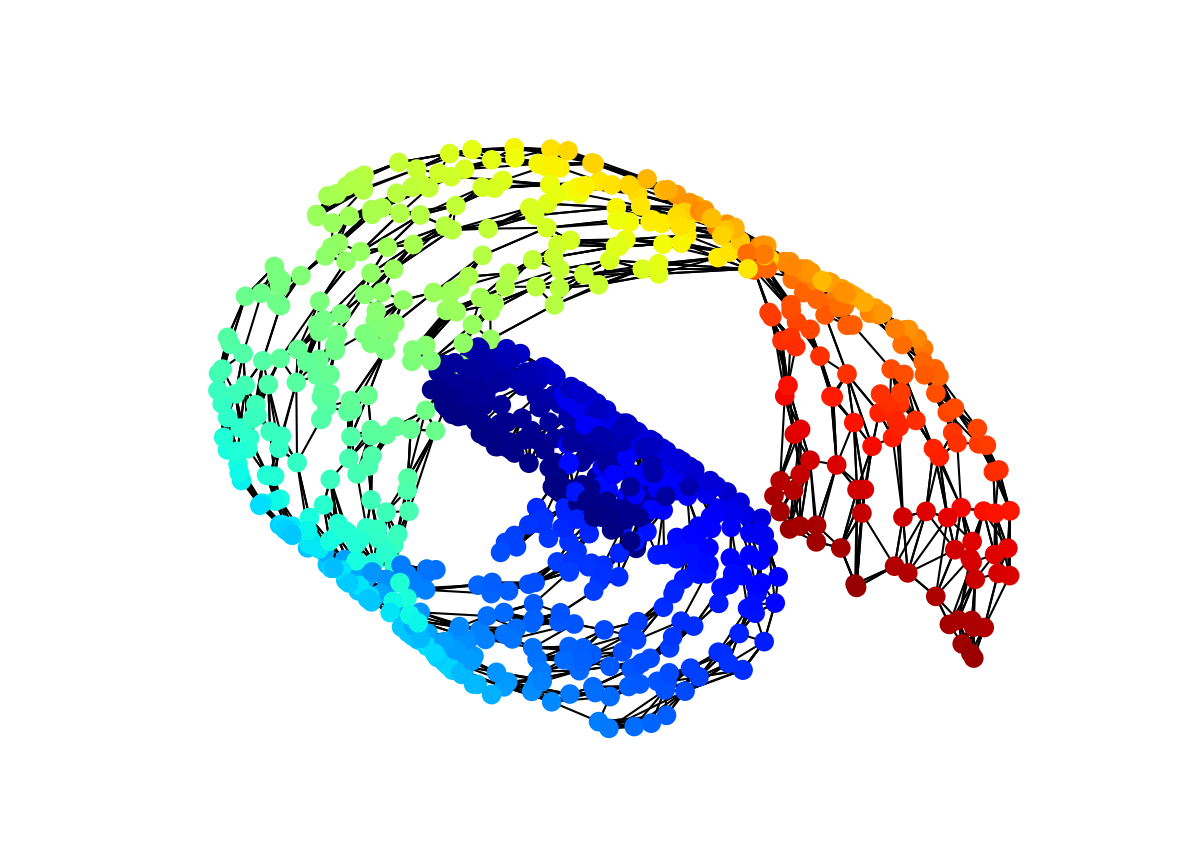

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111, projection="3d")

#swiss roll
ax.scatter(X[0,:], X[1,:], X[2,:], c=plt.cm.jet((X[0,:]**2+X[2,:]**2)/100), s=ms, lw=0, alpha=1)

#graph
I,J,V = sparse.find(A)
xx = np.vstack((X[0,I],X[0,J]))
yy = np.vstack((X[1,I],X[1,J]))
zz = np.vstack((X[2,I],X[2,J]))

for i in range(len(I)):
    ax.plot(xx[:,i], yy[:,i], zz[:,i], color="black")

#params
ax.axis("off")
ax.set_xlim(np.min(X[0,:]),np.max(X[0,:]))
ax.set_ylim(np.min(X[1,:]),np.max(X[1,:]))
ax.set_zlim(np.min(X[2,:]),np.max(X[2,:]))
ax.view_init(elev=el, azim=az)

plt.show();

Now we apply Isomap to a "Fishbowl" dataset and examine the effect of different values of k.

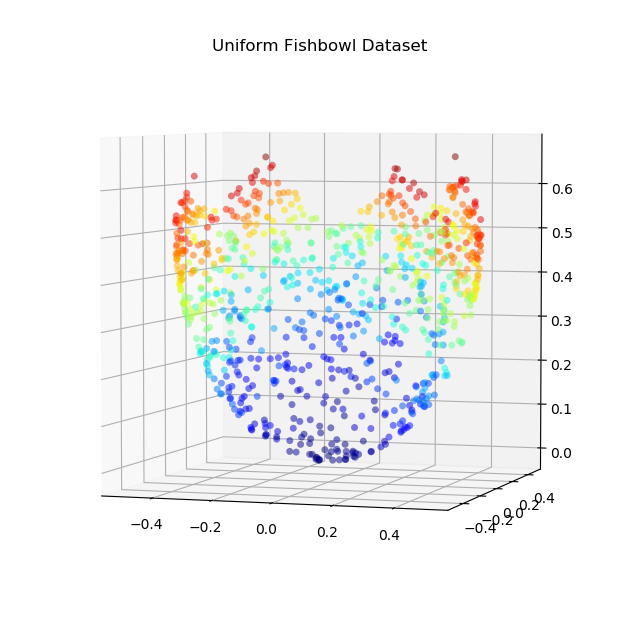

In [113]:
from numpy import random
data = random.uniform(-1, 1, (900,2))
s = data[:,0]
t = data[:,1]

x = s / (1 + s**2 + t**2)
y = t / (1 + s**2 + t**2)
z = (s**2 + t**2) / (1 + s**2 + t**2)
color = (x**2 + z**2) / 0.3

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# fishbowl dataset
ax.scatter(x, y, z, c=color, cmap=plt.cm.jet, s=25, lw=0, alpha=0.5);
plt.title('Uniform Fishbowl Dataset', size=12)
ax.view_init(4, -72);

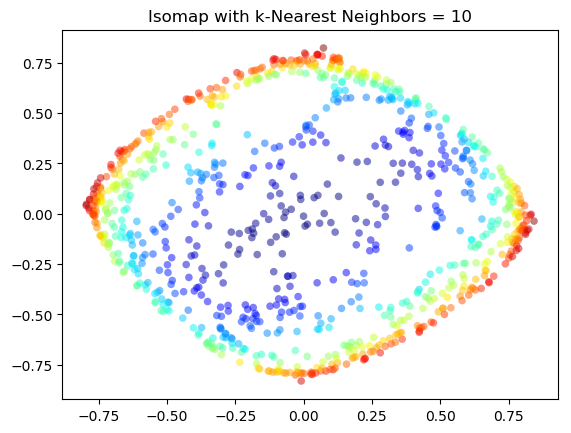

In [114]:
from sklearn.manifold import Isomap
X = np.hstack((x.reshape(-1,1),y.reshape(-1,1),z.reshape(-1,1)))
data = X

model = Isomap(n_components=2, n_neighbors=8)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5)
plt.title('Isomap with k-Nearest Neighbors = 10', size=12)
plt.show();

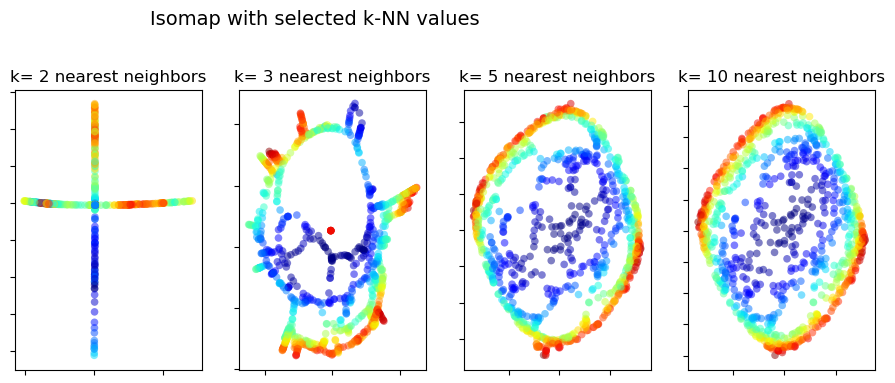

In [115]:
# Plot our dataset.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.utils import check_random_state

fig = plt.figure(figsize=(14, 8))
plt.suptitle("Isomap with selected k-NN values", fontsize=14)

# Isomap with different values for k-nearest neighbors
neighbors = [2, 3, 5, 10]

for i, neighbor in enumerate(neighbors):
    
    model = Isomap(n_components=2, n_neighbors=neighbor)
    proj = model.fit_transform(data)
        
    ax = fig.add_subplot(252 + i)
    plt.scatter(proj[:,0], proj[:,1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5);
    ax.xaxis.set_major_formatter(NullFormatter());
    ax.yaxis.set_major_formatter(NullFormatter());
    plt.title('k= ' +str(neighbor) + ' nearest neighbors')
    plt.axis('tight');
plt.show();


## More examples

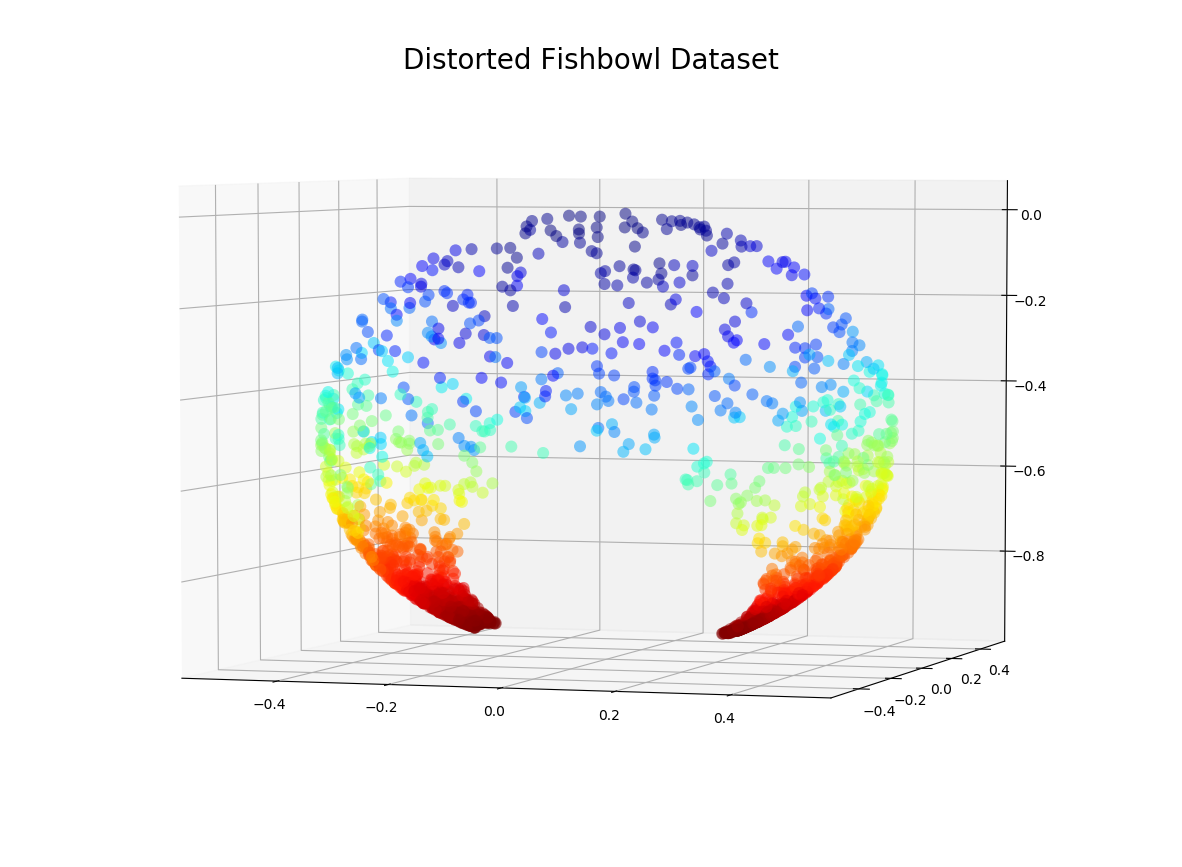

In [116]:
from numpy import random
data = random.uniform(-1, 1, (2000,2))
s = 4*data[:,0]
t = data[:,1]

x = s / (1 + s**2 + t**2)
y = t / (1 + s**2 + t**2)
z = -1* (s**2 + t**2) / (1 + s**2 + t**2)
color = (x**2 + z**2) / 0.3

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111, projection="3d")

# fishbowl dataset
ax.scatter(x, y, z, c=color, cmap=plt.cm.jet, s=75, lw=0, alpha=0.5);
plt.title('Distorted Fishbowl Dataset', size=20)
ax.view_init(4, -72);

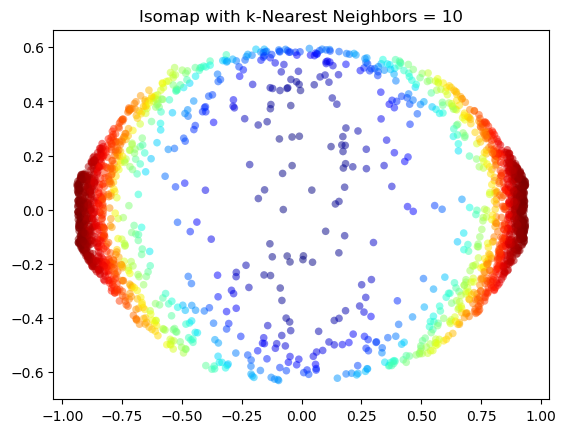

In [117]:
from sklearn.manifold import Isomap
X = np.hstack((x.reshape(-1,1),y.reshape(-1,1),z.reshape(-1,1)))
data = X

model = Isomap(n_components=2, n_neighbors=10)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5)
plt.title('Isomap with k-Nearest Neighbors = 10', size=12)
plt.show();

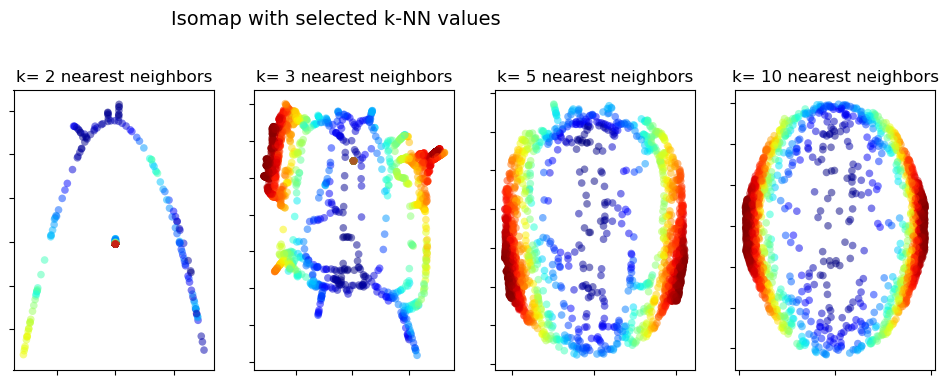

In [118]:
# Plot our dataset.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.utils import check_random_state

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Isomap with selected k-NN values", fontsize=14)


# Isomap with different values for k-nearest neighbors
neighbors = [2, 3, 5, 10]

for i, neighbor in enumerate(neighbors):
    
    model = Isomap(n_components=2, n_neighbors=neighbor)
    proj = model.fit_transform(data)
        
    ax = fig.add_subplot(252 + i)
    plt.scatter(proj[:,0], proj[:,1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5);
    ax.xaxis.set_major_formatter(NullFormatter());
    ax.yaxis.set_major_formatter(NullFormatter());
    plt.title('k= ' +str(neighbor) + ' nearest neighbors')
    plt.axis('tight');
plt.show();

Now we look at some more examples of non-convex manifolds by adding 'holes' to our data

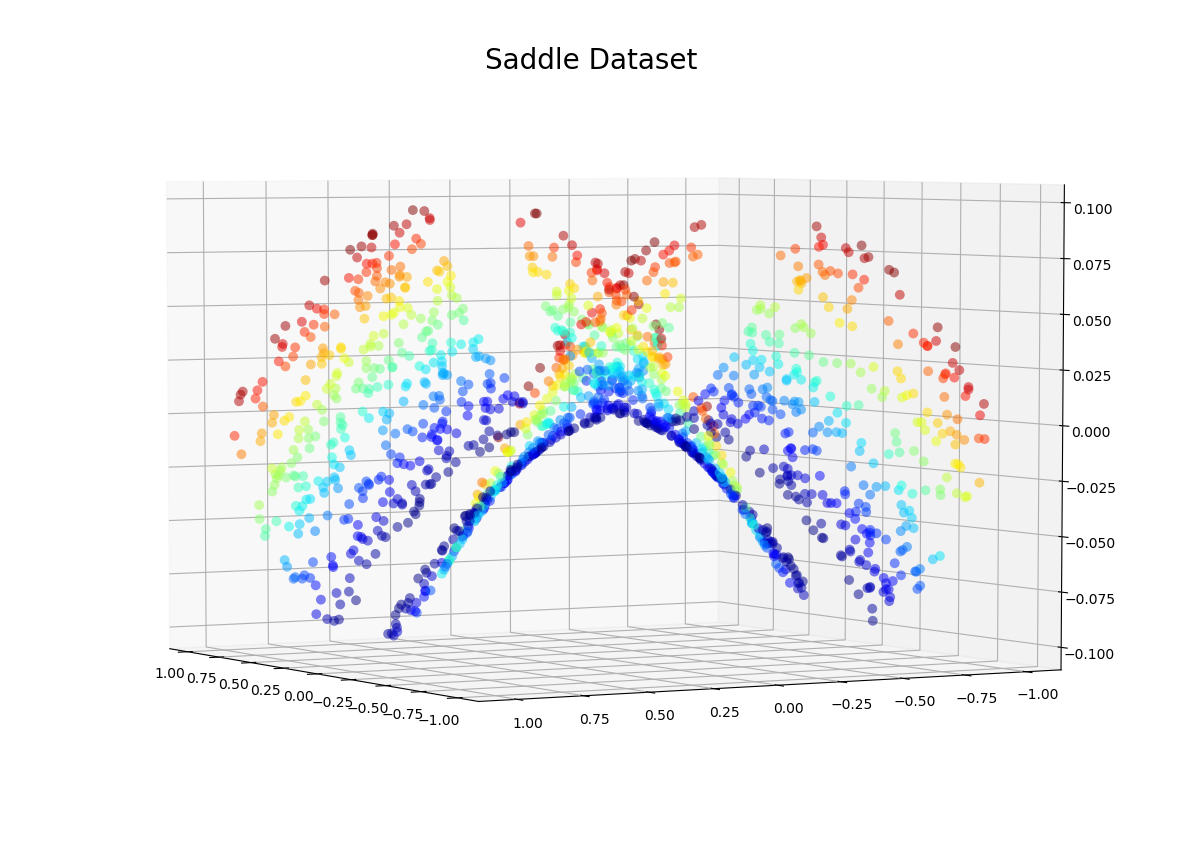

In [150]:
from numpy import random
data = random.uniform(-1, 1, (2000,2))

x = data[:,0]
y = data[:,1]
y2 = y[(abs(x) >= 0.15) & (abs(y) >= 0.15)]
x2 = x[(abs(x) >= 0.15) & (abs(y) >= 0.15)]
z = x2**2/10. - y2**2/10
color = (x2**2 + z**2) / 0.3

# color = color[(abs(z) >= 0.1) & (abs(x) >= 0.1)]

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111, projection="3d")

# fishbowl dataset
ax.scatter(x2, y2, z, c=color, cmap=plt.cm.jet, s=50, lw=0, alpha=0.5);
plt.title('Saddle Dataset', size=20)
ax.view_init(4, 150);

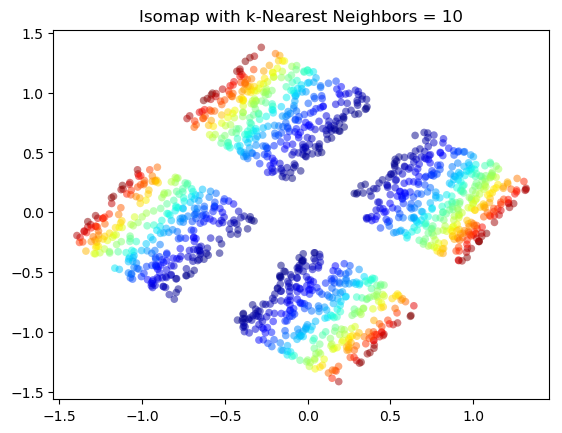

In [151]:
from sklearn.manifold import Isomap
X = np.hstack((x2.reshape(-1,1),y2.reshape(-1,1),z.reshape(-1,1)))
data = X

model = Isomap(n_components=2, n_neighbors=100)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5)
plt.title('Isomap with k-Nearest Neighbors = 10', size=12)
plt.show();

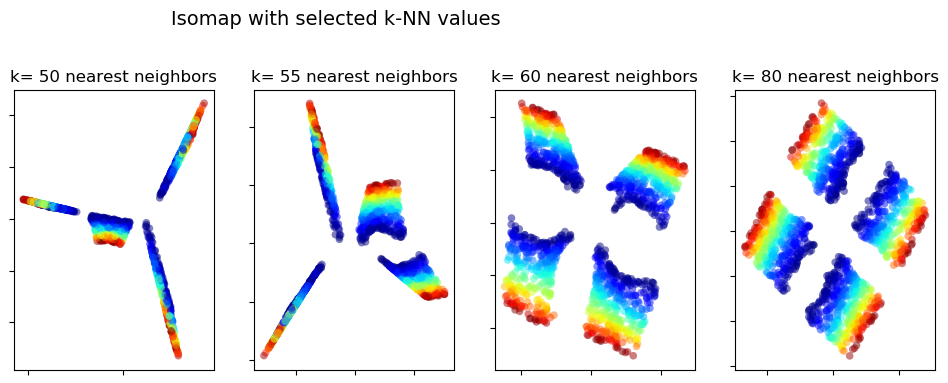

In [154]:
# Plot our dataset.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.utils import check_random_state

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Isomap with selected k-NN values", fontsize=14)

# Isomap with different values for k-nearest neighbors 
neighbors = [50, 55, 60, 80]

for i, neighbor in enumerate(neighbors):
    
    model = Isomap(n_components=2, n_neighbors=neighbor)
    proj = model.fit_transform(data)
        
    ax = fig.add_subplot(252 + i)
    plt.scatter(proj[:,0], proj[:,1], c=color, cmap=plt.cm.jet, s=20, lw=0, alpha=0.5);
    ax.xaxis.set_major_formatter(NullFormatter());
    ax.yaxis.set_major_formatter(NullFormatter());
    plt.title('k= ' +str(neighbor) + ' nearest neighbors')
    plt.axis('tight');
plt.show();

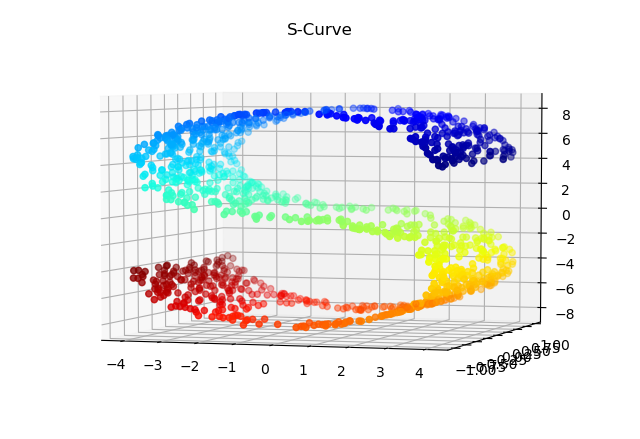

In [188]:
from sklearn.datasets.samples_generator import make_s_curve
plt.style.use('default')
data, color = make_s_curve(1500, random_state=0)
x = data[:, 0]*4 
y = data[:, 1] - 1
z = data[:, 2]*4

z2 = z[(abs(x) >= 2) | (abs(y) >= 0.5)]
y2 = y[(abs(x) >= 2) | (abs(y) >= 0.5)]
x2 = x[(abs(x) >= 2) | (abs(y) >= 0.5)]
color = color[(abs(x) >= 2) | (abs(y) >= 0.5)]

fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(x2, y2, z2, c=color, cmap=plt.cm.jet)
plt.title('S-Curve', size=12)
ax.view_init(4, -72);

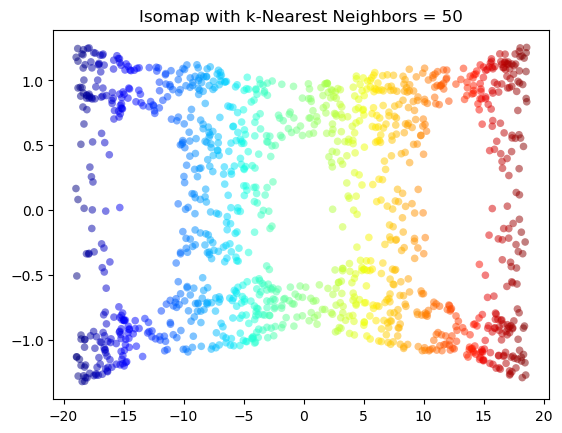

In [190]:
from sklearn.manifold import Isomap
X = np.hstack((x2.reshape(-1,1),y2.reshape(-1,1),z2.reshape(-1,1)))
data = X

k = 50

model = Isomap(n_components=2, n_neighbors=k)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5)
plt.title('Isomap with k-Nearest Neighbors = ' + str(k), size=12)
plt.show();

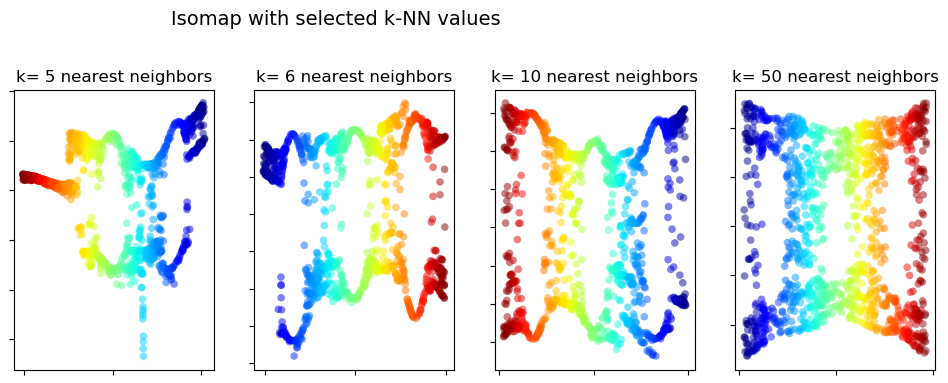

In [195]:
# Plot our dataset.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.utils import check_random_state

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Isomap with selected k-NN values", fontsize=14)


# Isomap with different values for k-nearest neighbors 
neighbors = [5, 6, 10, 50]

for i, neighbor in enumerate(neighbors):
    
    model = Isomap(n_components=2, n_neighbors=neighbor)
    proj = model.fit_transform(data)
        
    ax = fig.add_subplot(252 + i)
    plt.scatter(proj[:,0], proj[:,1], c=color, cmap=plt.cm.jet, s=30, lw=0, alpha=0.5);
    ax.xaxis.set_major_formatter(NullFormatter());
    ax.yaxis.set_major_formatter(NullFormatter());
    plt.title('k= ' +str(neighbor) + ' nearest neighbors')
    plt.axis('tight');
plt.show();


## References
[1]  _A Global Geometric Framework for Nonlinear Dimensionality Reduction,_
J. B. Tenenbaum, V. de Silva and J. C. Langford,
Science 290 (5500): 2319-2323, 22 December 2000. <br>
https://web.mit.edu/cocosci/Papers/sci_reprint.pdf